# Libraries to install 

cv2 -- pip install opencv 


In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


Uploading  an image 

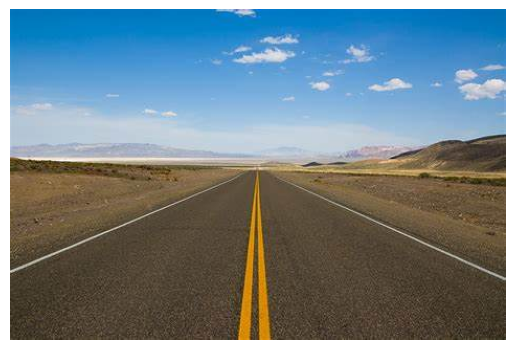

In [11]:
image_path = r'day1_images\1.jpeg'  # Asegúrate de que exista
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



Applying the canny filter

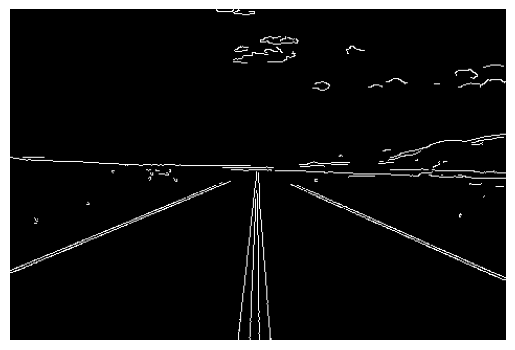

In [ ]:
image_path = r'day1_images\1.jpeg'  # Asegúrate de que exista
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image_rgb, 180, 300)  # Apply the canny filter  with threshold lower  50 to 150 on upper 

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

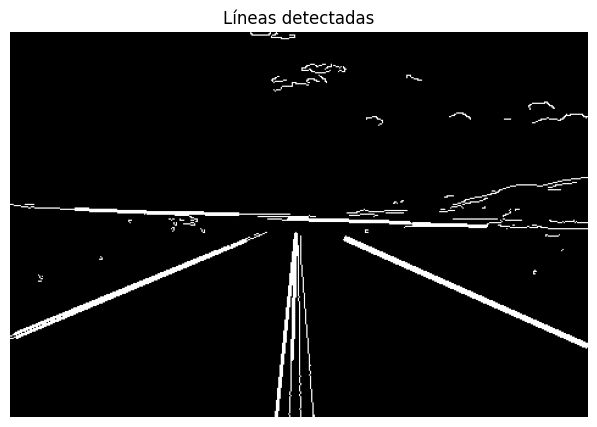

In [34]:

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Detección de bordes
edges = cv2.Canny(gray, 180, 300)

# Detección de líneas
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Dibujar líneas sobre una copia de la imagen original
output = edges.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Mostrar imagen resultante
plt.figure(figsize=(10, 5))
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.title('Líneas detectadas')
plt.show()


Opening the camera

In [ ]:
cap = cv2.VideoCapture(0) # Capture the photograms, 0 is the number of the camera 

while True :
    ret, frame = cap.read() # Read the frame and size 
    if not ret: # If there is nothing the code finish 
        break
    
    # cv2.imshow create a window
    cv2.imshow("Cheese", frame)  # Name of the window is "cheese", and will be adding frame to that window 

    if cv2.waitKey(1) & 0xFF == ord('q'): #If you want to finish press q (you can change the keyboard you want)
        break

    #The whole loop get updated per photogram 

cap.release() # Finish to capturing 
cv2.destroyAllWindows() # Close the window 


Now with the *canny* processing 

t_lower : If a pixel’s gradient is below this value, it’s rejected outright. 

t_upper : Pixels with gradients above this value are definitely considered edges.

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 
    edges = cv2.Canny(gray, 50, 150)  # Apply the canny filter  with threshold lower  50 to 150 on upper 

    # Mostrar resultado
    cv2.imshow("Canny", edges)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



KeyboardInterrupt: 